In [1]:
import xarray as xr

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import xrft

In [46]:
base_dir = "/pscratch/sd/n/nloose/ClimaOceanALK/tidal_forcing/"

In [47]:
ds_spinup = xr.open_dataset(f"{base_dir}/quarter_degree_spinup_without_tides_10_levels.nc")
ds_spinup["time"] = ds_spinup["time"] / np.timedelta64(1, 'D')

In [48]:
ds_spinup

<xarray.Dataset> Size: 12kB
Dimensions:               (zC: 10, zF: 11, xC: 200, yF: 201, xF: 201, yC: 200,
                           time: 181)
Coordinates:
  * zC                    (zC) float64 80B -4.901e+03 -3.1e+03 ... -68.34 -19.15
  * zF                    (zF) float64 88B -6e+03 -3.801e+03 ... -38.31 0.0
  * xC                    (xC) float64 2kB 200.1 200.4 200.6 ... 249.6 249.9
  * yF                    (yF) float64 2kB -75.0 -74.75 -74.5 ... -25.25 -25.0
  * xF                    (xF) float64 2kB 200.0 200.2 200.5 ... 249.8 250.0
  * yC                    (yC) float64 2kB -74.88 -74.62 ... -25.38 -25.12
  * time                  (time) float64 1kB 0.0 1.0 2.0 ... 178.0 179.0 180.0
Data variables:
    u_squared_integrated  (time) float64 1kB ...
    w_squared_integrated  (time) float64 1kB ...
    v_squared_integrated  (time) float64 1kB ...
Attributes:
    time averaging stride:  Output was time averaged with a stride of 1 itera...
    interval:               86400.0
    time_averaging_window:  86400.0
    time_averaging_stride:  1
    Oceananigans:           This file was generated using Oceananigans v0.95.20
    Julia:                  This file was generated using Julia Version 1.11....
    output time interval:   Output was saved every 1 day.
    date:                   This file was generated on 2025-03-10T15:47:24.295.
    time averaging window:  Output was time averaged with a window size of 1 day
    schedule:               TimeInterval

In [49]:
ds = xr.open_dataset(f"{base_dir}/quarter_degree_hourly_averages_without_tides_10_levels.nc")
ds["time"] = ds["time"] / np.timedelta64(1, 'D')

In [50]:
ds

<xarray.Dataset> Size: 22GB
Dimensions:  (zC: 10, zF: 11, xC: 200, yF: 201, xF: 201, yC: 200, time: 4321)
Coordinates:
  * zC       (zC) float32 40B -4.901e+03 -3.1e+03 -1.952e+03 ... -68.34 -19.15
  * zF       (zF) float32 44B -6e+03 -3.801e+03 -2.399e+03 ... -98.38 -38.31 0.0
  * xC       (xC) float32 800B 200.1 200.4 200.6 200.9 ... 249.4 249.6 249.9
  * yF       (yF) float32 804B -75.0 -74.75 -74.5 -74.25 ... -25.5 -25.25 -25.0
  * xF       (xF) float32 804B 200.0 200.2 200.5 200.8 ... 249.5 249.8 250.0
  * yC       (yC) float32 800B -74.88 -74.62 -74.38 ... -25.62 -25.38 -25.12
  * time     (time) float64 35kB 0.0 0.04167 0.08333 0.125 ... 179.9 180.0 180.0
Data variables:
    v        (time, zC, yF, xC) float32 7GB ...
    w        (time, zF, yC, xC) float32 8GB ...
    u        (time, zC, yC, xF) float32 7GB ...
Attributes:
    time averaging stride:  Output was time averaged with a stride of 1 itera...
    interval:               3600.0
    time_averaging_window:  3600.0
    time_averaging_stride:  1
    Oceananigans:           This file was generated using Oceananigans v0.95.20
    Julia:                  This file was generated using Julia Version 1.11....
    output time interval:   Output was saved every 1 hour.
    date:                   This file was generated on 2025-03-10T15:47:46.256.
    time averaging window:  Output was time averaged with a window size of 1 ...
    schedule:               TimeInterval

### Analysis window

In [51]:
KE = ds_spinup["u_squared_integrated"] + ds_spinup["v_squared_integrated"] + ds_spinup["w_squared_integrated"]

Text(0.5, 1.0, 'Domain-integrated kinetic energy')

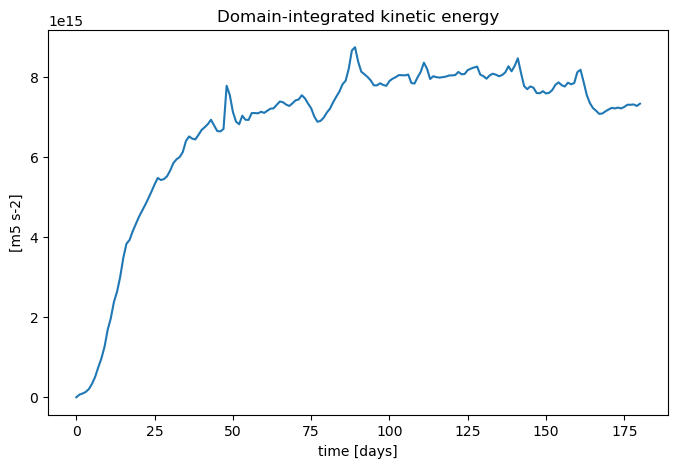

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

KE.plot()

ax.set_xlabel("time [days]")
ax.set_ylabel("[m5 s-2]")
ax.set_title("Domain-integrated kinetic energy")

### Choose spatial and temporal subdomain

In [53]:
ds = ds.isel(time=slice(90*24, None)) # discard the first 90 days

In [54]:
ds

<xarray.Dataset> Size: 11GB
Dimensions:  (zC: 10, zF: 11, xC: 200, yF: 201, xF: 201, yC: 200, time: 2161)
Coordinates:
  * zC       (zC) float32 40B -4.901e+03 -3.1e+03 -1.952e+03 ... -68.34 -19.15
  * zF       (zF) float32 44B -6e+03 -3.801e+03 -2.399e+03 ... -98.38 -38.31 0.0
  * xC       (xC) float32 800B 200.1 200.4 200.6 200.9 ... 249.4 249.6 249.9
  * yF       (yF) float32 804B -75.0 -74.75 -74.5 -74.25 ... -25.5 -25.25 -25.0
  * xF       (xF) float32 804B 200.0 200.2 200.5 200.8 ... 249.5 249.8 250.0
  * yC       (yC) float32 800B -74.88 -74.62 -74.38 ... -25.62 -25.38 -25.12
  * time     (time) float64 17kB 90.0 90.04 90.08 90.12 ... 179.9 180.0 180.0
Data variables:
    v        (time, zC, yF, xC) float32 3GB ...
    w        (time, zF, yC, xC) float32 4GB ...
    u        (time, zC, yC, xF) float32 3GB ...
Attributes:
    time averaging stride:  Output was time averaged with a stride of 1 itera...
    interval:               3600.0
    time_averaging_window:  3600.0
    time_averaging_stride:  1
    Oceananigans:           This file was generated using Oceananigans v0.95.20
    Julia:                  This file was generated using Julia Version 1.11....
    output time interval:   Output was saved every 1 hour.
    date:                   This file was generated on 2025-03-10T15:47:46.256.
    time averaging window:  Output was time averaged with a window size of 1 ...
    schedule:               TimeInterval

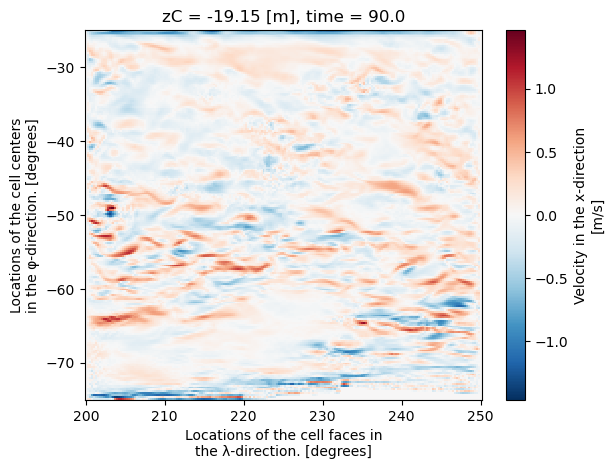

In [55]:
ds.u.isel(zC=-1, time=0).plot()

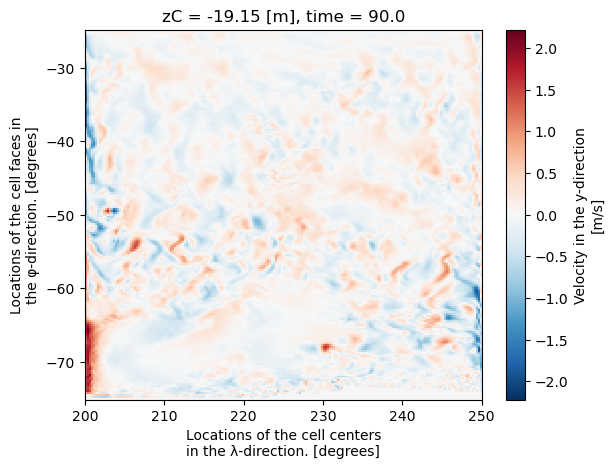

In [56]:
ds.v.isel(zC=-1, time=0).plot()

### Infer grid metrics

In [57]:
import sys
import os
sys.path.append("../")
from grid import latitude_longitude_grid

In [58]:
ds_grid = latitude_longitude_grid(ds, resolution=1)

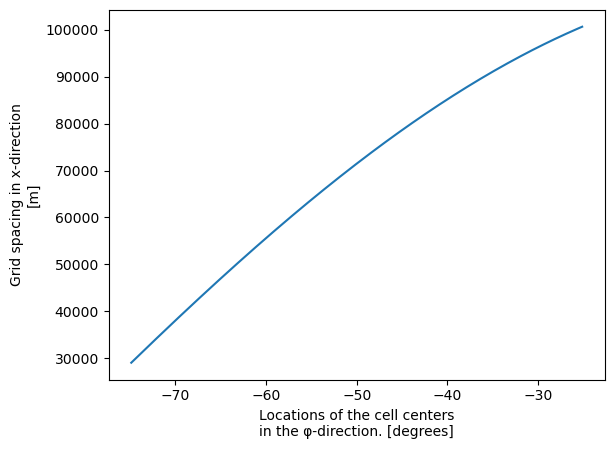

In [59]:
ds_grid.dx.plot()

### Interpolate surface velocities to cell center

In [115]:
u = ds["u"].isel(zC=-1) # surface
v = ds["v"].isel(zC=-1) # surface

In [116]:
u_center = 0.5 * (u + u.shift(xF=1)).isel(xF=slice(1, None)).swap_dims({"xF": "xC"})
v_center = 0.5 * (v + v.shift(yF=1)).isel(yF=slice(1, None)).swap_dims({"yF": "yC"})

In [117]:
v_center["yC"] = u_center["yC"]
u_center["xC"] = v_center["xC"]

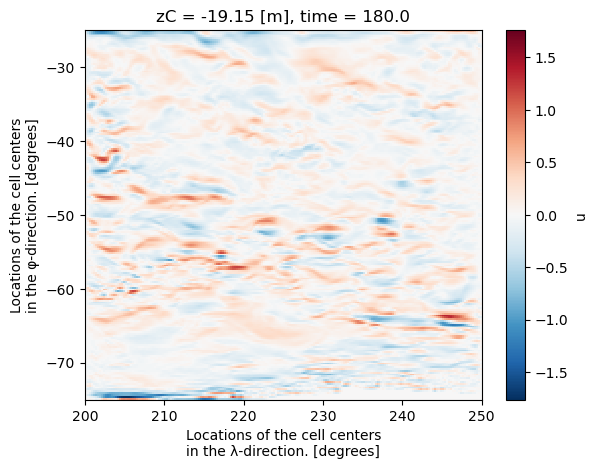

In [118]:
u_center.isel(time=-1).plot()

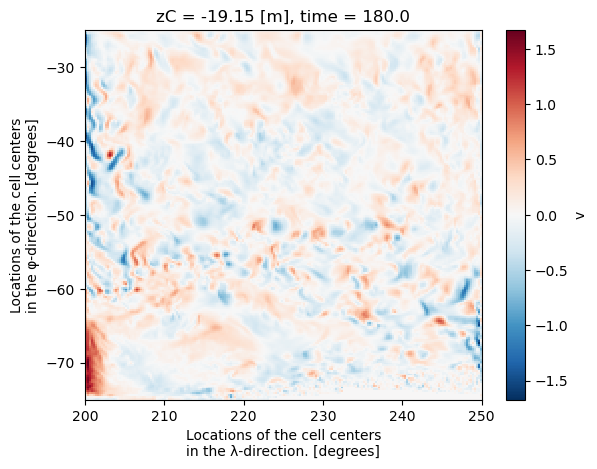

In [119]:
v_center.isel(time=-1).plot()

In [120]:
u_center = u_center.drop_vars("xF")
v_center = v_center.drop_vars("yF")

## Horizontal wavenumber spectra

### 1d wavenumber spectrum along fixed latitude

* computed from meridional eddy velocity $v'$

In [209]:
def plot_1d_spectrum(latitude):

    fig, ax = plt.subplots(1, 1, figsize=(8, 7))

    dxF = ds_grid["dxF"].sel(yF=latitude, method="nearest")
    distance = np.arange(0, len(ds.xC) * dxF, dxF)

    v = ds["v"].isel(zC=-1).sel(yF=latitude, method="nearest").fillna(0.)
    v = v.assign_coords(xC=distance)

    # use meridional eddy velocity v'
    v = v - v.mean(dim="time")

    viso2 = xrft.power_spectrum(v, dim=['xC'], scaling="density", window="hann", detrend="linear")
    ekeiso = .5*(viso2) 
    nk = int(len(ekeiso)/2.)
    ekeiso = ekeiso.isel(freq_xC=slice(int(len(ekeiso.freq_xC) /2.), None)) # just one half of the symmetric spectrum
    wavenumber = (ekeiso.freq_xC * 1000 * 2 * np.pi)  # convert cycles per m to wavenumber in 1/km

    # Time mean
    ekeiso_mean = ekeiso.mean(dim="time")
    # Standard deviation
    ekeiso_std = ekeiso.std(dim="time")
    ax.plot(wavenumber, ekeiso_mean, linewidth=3, color='k', label="Time mean")
    ax.fill_between(wavenumber, ekeiso_mean - ekeiso_std, ekeiso_mean + ekeiso_std, color='orange', alpha=0.3, label=r"Envelope ($\pm \sigma$)")

    # Add k^-3 slope
    ref_k = 20
    k_ref = wavenumber.isel(freq_xC=ref_k).item()  # Choose a reference wavenumber
    E_ref = ekeiso_mean.isel(freq_xC=ref_k).item()  # Choose a corresponding reference energy level
    k_slope = np.linspace(wavenumber.isel(freq_xC=5), wavenumber.isel(freq_xC=-1), 10)  # Generate wavenumber range
    E_slope = E_ref * (k_slope / k_ref) ** -3  # Compute k^-3 power law
    ax.plot(k_slope, E_slope, linestyle="dashed", color="green", linewidth=2, label=r"$k^{-3}$ slope")

    ax.set_title(fr"1D kinetic energy spectrum at {latitude}$^\circ$N", fontsize=18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('')
    ax.set_ylim([1, 1e5])
    ax.grid()
    ax.tick_params(labelsize=18);
    ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)
    ax.set_xlabel(r'Wavenumber k [1/km]',fontsize=16)
    ax.legend(fontsize=16)

    return fig

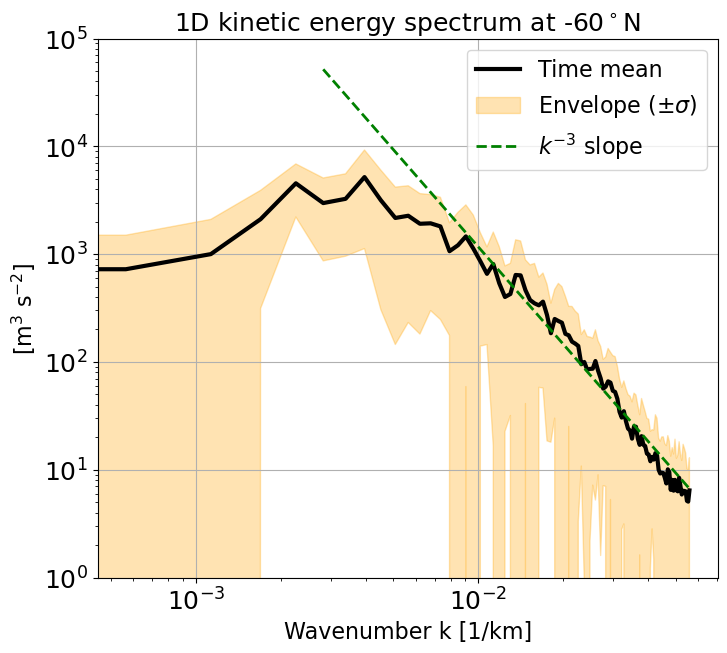

In [210]:
fig = plot_1d_spectrum(-60)
#figname= 'figures/spectra.png' 
#plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

### 2d wavenumber spectrum

* averaged over full domain
* with the (wrong) assumption that the data sits on a uniform grid

In [219]:
def plot_2d_spectrum():

    fig, ax = plt.subplots(1, 1, figsize=(8, 7))

    # The following approach is somewhat of a workaround. Ideally, u and v should be 
    # regridded onto a uniform grid first, rather than assuming they are already 
    # on a uniform grid and inferring dx and dy from their respective means.
    
    dx = ds_grid["dx"].mean(dim="yC").item()
    dy = ds_grid["dy"].item()

    # Define uniform grid
    x = dx * np.arange(len(u_center.xC))
    y = dy * np.arange(len(u_center.yC))
    
    u_center['xC'] = x
    u_center['yC'] = y
    v_center['xC'] = x
    v_center['yC'] = y

    kwargs = {
        "window": "hann",
        "nfactor": 2,
        "truncate": True,
        "detrend": "linear",
        "window_correction": True
    }
    
    Eu = xrft.isotropic_power_spectrum(u_center, dim=('xC','yC'), **kwargs)
    Ev = xrft.isotropic_power_spectrum(v_center, dim=('xC','yC'), **kwargs)
    
    E = (Eu + Ev) / 2 # because power spectrum is twice the energy
    wavenumber = (E.freq_r * 1000 * 2 * np.pi)  # convert cycles per m to wavenumber in 1/km

    E_mean = E.mean(dim="time")
    E_std = E.std(dim="time")

    ax.plot(wavenumber, E_mean, linewidth=3, color='k', label="Time mean")
    ax.fill_between(wavenumber, E_mean - E_std, E_mean + E_std, color='orange', alpha=0.3, label=r"Envelope ($\pm \sigma$)")

    # Add k^-3 slope
    ref_k = 20
    k_ref = wavenumber.isel(freq_r=ref_k).item()  # Choose a reference wavenumber
    E_ref = E_mean.isel(freq_r=ref_k).item()  # Choose a corresponding reference energy level
    k_slope = np.linspace(wavenumber.isel(freq_r=10), wavenumber.isel(freq_r=-1), 10)  # Generate wavenumber range
    E_slope = E_ref * (k_slope / k_ref) ** -3  # Compute k^-3 power law
    ax.plot(k_slope, E_slope, linestyle="dashed", color="green", linewidth=2, label=r"$k^{-3}$ slope")

    ax.set_title("2D kinetic energy spectrum", fontsize=18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([50, 2e4])
    ax.set_xlabel('')
    ax.grid()
    ax.tick_params(labelsize=18);
    ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)
    ax.set_xlabel(r'Wavenumber k [1/km]',fontsize=16)
    ax.legend(fontsize=16)

    return fig

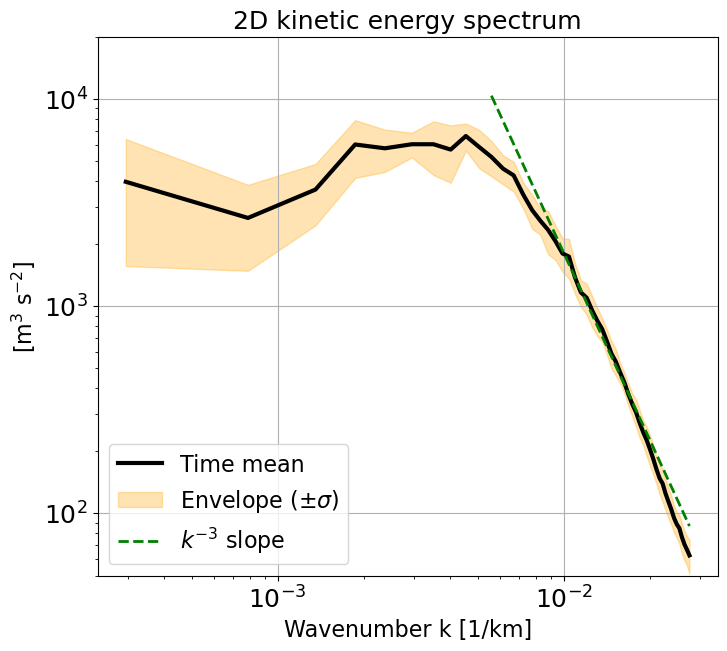

In [220]:
fig = plot_2d_spectrum()